<a href="https://colab.research.google.com/github/Cesaraville/Housing-Price-Predictor/blob/main/Heart_Disease_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import keras
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/heart_disease_uci.csv')

In [3]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df = df.drop((753), axis = 0) #Outlier

# Cleaning Dataset

In [5]:
df.isnull().sum().sort_values(ascending=False)

,0
ca,610
thal,485
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [6]:
Null = (((df.isnull().sum())/len(df))*100).sort_values(ascending=False)
Null

,0
ca,66.376496
thal,52.774755
slope,33.623504
fbs,9.793254
oldpeak,6.746464
trestbps,6.420022
exang,5.984766
thalch,5.984766
chol,3.264418
restecg,0.217628


In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,860.000000,889.000000,864.000000,857.000000,309.000000,919.000000
mean,460.180631,53.509249,132.286047,199.354331,137.525463,0.878063,0.676375,0.993471
std,265.693391,9.429689,18.536175,110.641330,25.934480,1.091657,0.935653,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,689.500000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#Divinding the Dataset

In [8]:
Numerical = df.select_dtypes(include=np.number)
Categorical = df.select_dtypes(exclude=np.number)

In [9]:
Numerical.corrwith(df['num']).sort_values(ascending=False)

,0
num,1.000000
ca,0.516216
oldpeak,0.442811
age,0.339868
id,0.272078
trestbps,0.141189
chol,-0.228834
thalch,-0.368449


#Categorical Dataset

In [10]:
Categorical = Categorical.fillna('Not Available')

In [11]:
Categorical.isnull().sum().sum()

np.int64(0)

In [12]:
Categorical

,sex,dataset,cp,fbs,restecg,exang,slope,thal
0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...,...,...,...
915,Female,VA Long Beach,asymptomatic,True,st-t abnormality,False,Not Available,Not Available
916,Male,VA Long Beach,typical angina,False,st-t abnormality,Not Available,Not Available,Not Available
917,Male,VA Long Beach,asymptomatic,True,st-t abnormality,False,Not Available,fixed defect
918,Male,VA Long Beach,asymptomatic,True,lv hypertrophy,Not Available,Not Available,Not Available


## One Hot Encoding

In [13]:
Categorical = pd.get_dummies(Categorical)

#Numerical Dataset

In [14]:
Numerical = Numerical.fillna(Numerical.median())
Numerical.isnull().sum().sum()

np.int64(0)

In [15]:
Numerical

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,0.0,1
916,917,62,130.0,139.0,140.0,0.5,0.0,0
917,918,55,122.0,223.0,100.0,0.0,0.0,2
918,919,58,130.0,385.0,140.0,0.5,0.0,0


In [16]:
Numerical.corrwith(df['num']).sort_values(ascending=False)

,0
num,1.000000
oldpeak,0.411193
age,0.339868
id,0.272078
ca,0.262947
trestbps,0.130757
chol,-0.227835
thalch,-0.351168


In [17]:
Numerical.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239273,0.049418,-0.369437,-0.429952,0.013310,-0.385731,0.272078
age,0.239273,1.000000,0.238769,-0.085853,-0.349928,0.233496,0.219493,0.339868
trestbps,0.049418,0.238769,1.000000,0.077528,-0.102301,0.170845,0.037336,0.130757
chol,-0.369437,-0.085853,0.077528,1.000000,0.227898,0.048774,0.152082,-0.227835
thalch,-0.429952,-0.349928,-0.102301,0.227898,1.000000,-0.149928,0.038490,-0.351168
oldpeak,0.013310,0.233496,0.170845,0.048774,-0.149928,1.000000,0.218712,0.411193
ca,-0.385731,0.219493,0.037336,0.152082,0.038490,0.218712,1.000000,0.262947
num,0.272078,0.339868,0.130757,-0.227835,-0.351168,0.411193,0.262947,1.000000


##Data Manipulation

### Y-Intercept

In [18]:
Numerical['num'].unique()

array([0, 2, 1, 3, 4])

In [19]:
print(sum(Numerical['num'] == 0))
print(sum(Numerical['num'] == 1))
print(sum(Numerical['num'] == 2))
print(sum(Numerical['num'] == 3))
print(sum(Numerical['num'] == 4))

411
265
109
106
28


In [20]:
411 + 265 + 109 + 107 + 28

920

In [21]:
Numerical['num'] = Numerical['num'].clip(lower = 0, upper = 1)

411
508


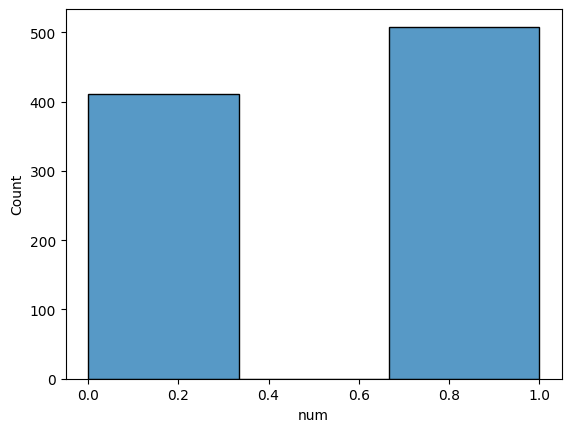

In [22]:
sns.histplot(data=Numerical, x='num', bins=3)
print(sum(Numerical['num'] == 0))
print(sum(Numerical['num'] == 1))

0 = No Heart Disease, 1 = Heart Disease

###ID

<Axes: xlabel='id', ylabel='num'>

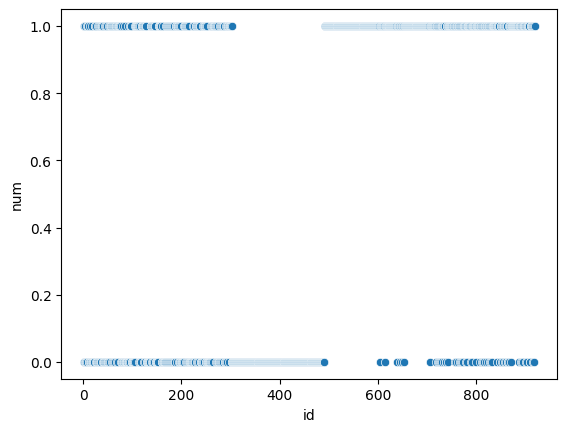

In [23]:
sns.scatterplot(data=Numerical, x='id', y='num')

<Axes: xlabel='id', ylabel='Count'>

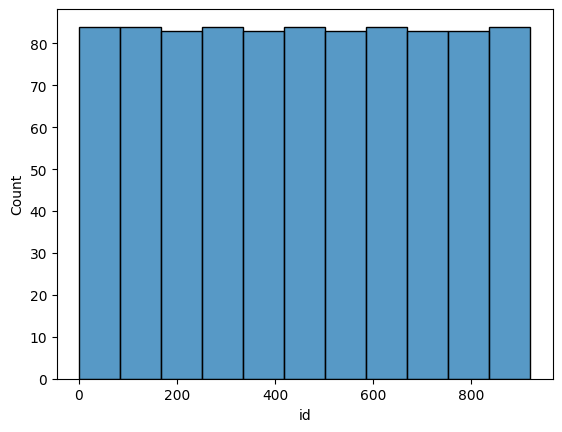

In [24]:
sns.histplot(data=Numerical, x='id')

### Age

<Axes: xlabel='age', ylabel='num'>

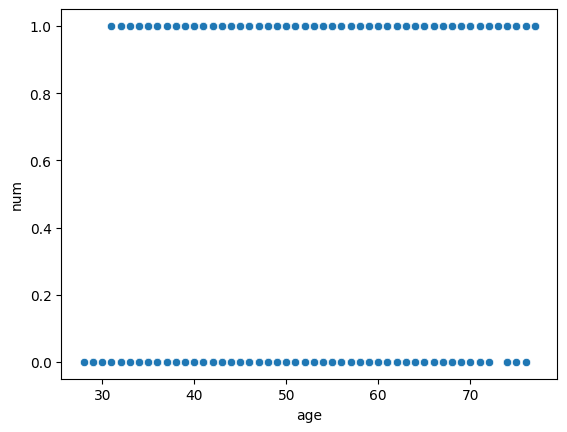

In [25]:
sns.scatterplot(data=Numerical, x='age', y='num')

<Axes: xlabel='age', ylabel='Count'>

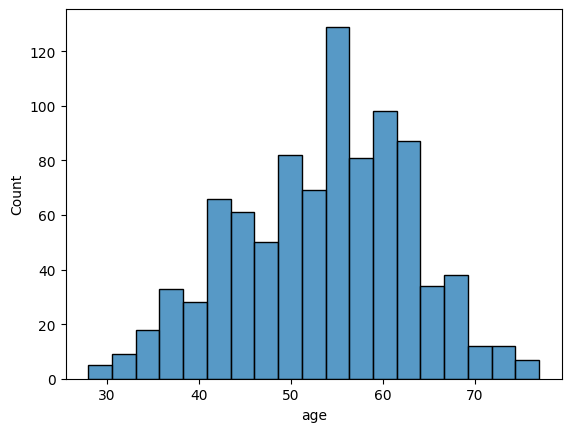

In [26]:
sns.histplot(data=Numerical, x='age')

###Trestbps

<Axes: xlabel='trestbps', ylabel='num'>

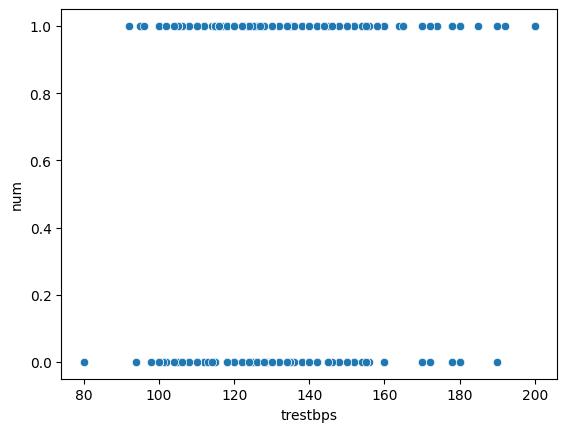

In [27]:
sns.scatterplot(data=Numerical, x='trestbps', y='num')

<Axes: xlabel='trestbps', ylabel='Count'>

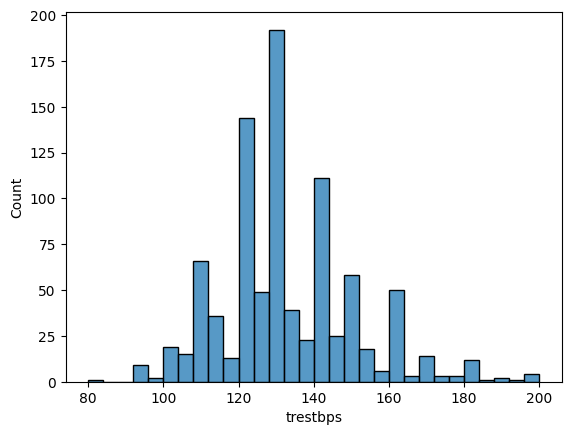

In [28]:
sns.histplot(data=Numerical, x='trestbps')

In [29]:
Numerical['trestbps'].sort_values(ascending=False)

,trestbps
548,200.0
701,200.0
680,200.0
126,200.0
188,192.0
...,...
597,95.0
131,94.0
222,94.0
499,92.0


### Chol

<Axes: xlabel='chol', ylabel='num'>

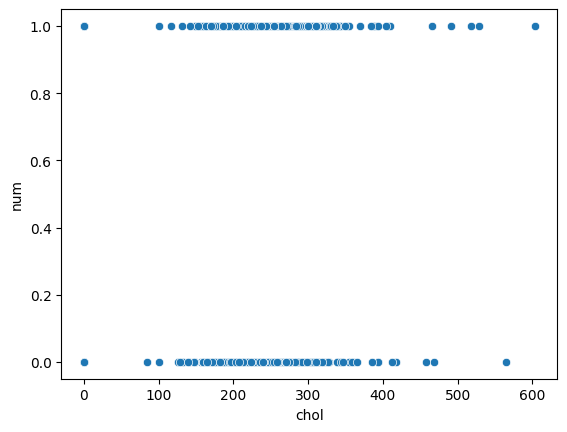

In [30]:
sns.scatterplot(data=Numerical, x='chol', y='num')

<Axes: xlabel='chol', ylabel='Count'>

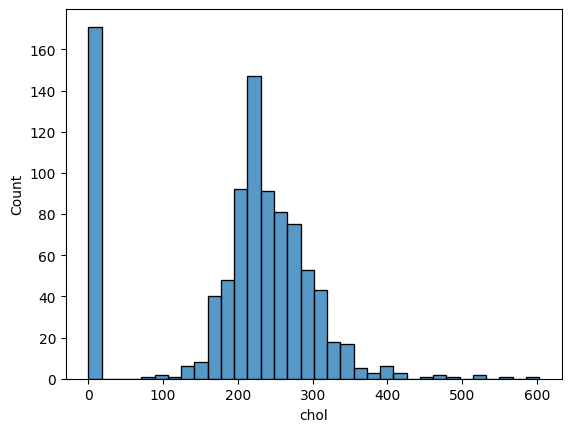

In [31]:
sns.histplot(data=Numerical, x='chol')

In [32]:
Numerical['chol'] = np.log(Numerical['chol'])
Numerical['chol'] = Numerical['chol'].replace([np.inf, -np.inf], 0)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Thalch

<Axes: xlabel='thalch', ylabel='num'>

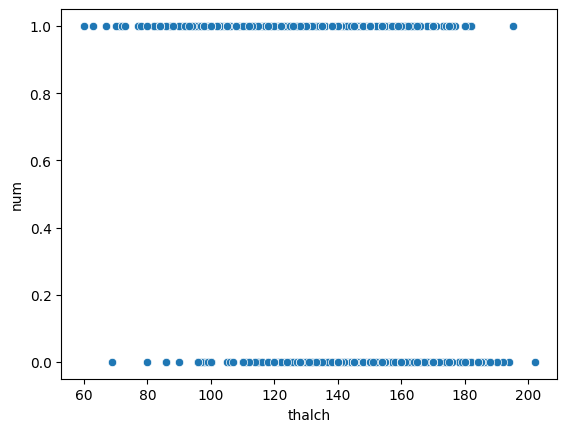

In [33]:
sns.scatterplot(data=Numerical, x='thalch', y='num')

<Axes: xlabel='thalch', ylabel='Count'>

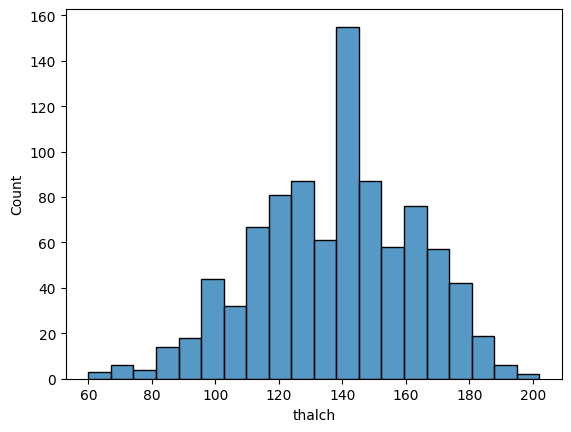

In [34]:
sns.histplot(data=Numerical, x='thalch')

### Old Peak

<Axes: xlabel='oldpeak', ylabel='num'>

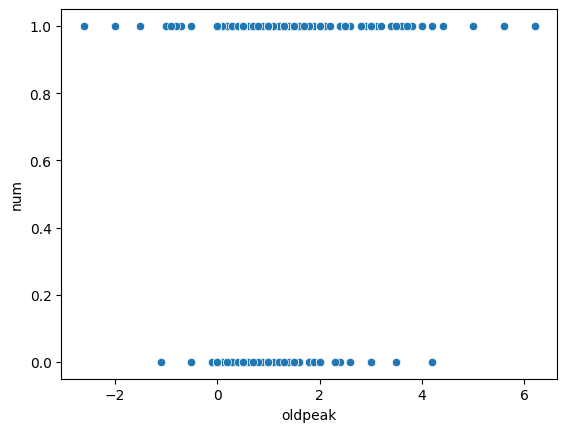

In [35]:
sns.scatterplot(data=Numerical, x='oldpeak', y='num')

<Axes: xlabel='oldpeak', ylabel='Count'>

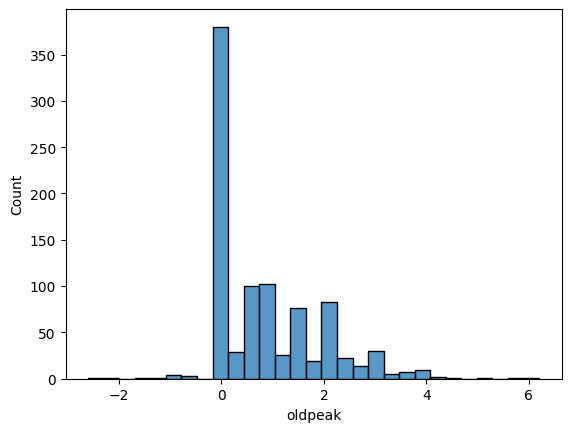

In [36]:
sns.histplot(data=Numerical, x='oldpeak')

### ca

<Axes: xlabel='ca', ylabel='num'>

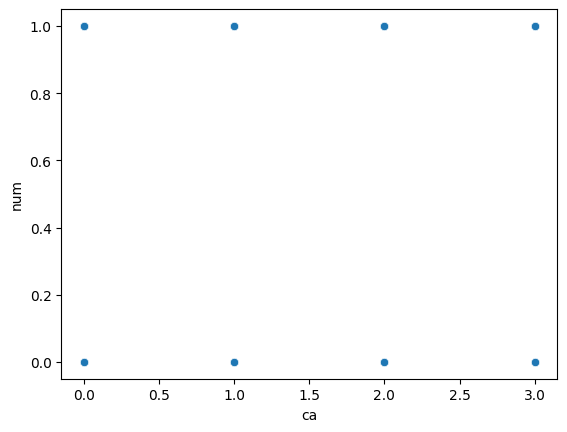

In [37]:
sns.scatterplot(data=Numerical, x='ca', y='num')

<Axes: xlabel='ca', ylabel='Count'>

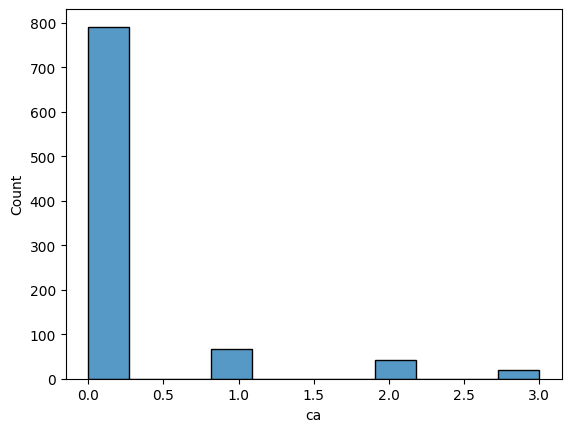

In [38]:
sns.histplot(data=Numerical, x='ca')

In [39]:
Numerical['ca'] = np.log(Numerical['ca'])
Numerical['ca'] = Numerical['ca'].replace([np.inf, -np.inf], 0)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Data Splitting

In [42]:
df2 = pd.concat([Numerical, Categorical], axis=1)

In [43]:
df2 = df2.fillna(df2.median())
df2.isnull().sum().sum()

np.int64(0)

In [44]:
x = df2.drop('num', axis=1)
y = df2['num']

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier()

model2.fit(x_train, y_train)

GradientBoostingClassifier()

In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier

model3 = HistGradientBoostingClassifier()

model3.fit(x_train, y_train)

HistGradientBoostingClassifier()

In [49]:
from sklearn.ensemble import AdaBoostClassifier

model4 = AdaBoostClassifier()

model4.fit(x_train, y_train)

AdaBoostClassifier()

In [50]:
from sklearn.neural_network import MLPClassifier

model5 = MLPClassifier()

model5.fit(x_train, y_train)

MLPClassifier()

In [51]:
y_pred = model.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score

print("Random Forest Classiflier: ", accuracy_score(y_test, y_pred))
print("Gradient Boosting Classifier: ", accuracy_score(y_test, y_pred2))
print("Hist Gradient Boosting Classifier: ", accuracy_score(y_test, y_pred3))
print("Ada Boost Classifier: ", accuracy_score(y_test, y_pred4))
print("MLP Classifier: ", accuracy_score(y_test, y_pred5))

Random Forest Classiflier:  0.875
Gradient Boosting Classifier:  0.8532608695652174
Hist Gradient Boosting Classifier:  0.8804347826086957
Ada Boost Classifier:  0.8641304347826086
MLP Classifier:  0.7989130434782609


### Classification Threshold

In [53]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
y_pred_proba2 = model2.predict_proba(x_test)[:, 1]
y_pred_proba3 = model3.predict_proba(x_test)[:, 1]
y_pred_proba4 = model4.predict_proba(x_test)[:, 1]
y_pred_proba5 = model5.predict_proba(x_test)[:, 1]

In [96]:
threshold = 0.41
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred2 = (y_pred_proba2 >= threshold).astype(int)
y_pred3 = (y_pred_proba3 >= threshold).astype(int)
y_pred4 = (y_pred_proba4 >= threshold).astype(int)
y_pred5 = (y_pred_proba5 >= threshold).astype(int)

## Results

In [97]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

auc = roc_auc_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_pred2)
auc3 = roc_auc_score(y_test, y_pred3)
auc4 = roc_auc_score(y_test, y_pred4)
auc5 = roc_auc_score(y_test, y_pred5)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_pred3).ravel()
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_pred4).ravel()
tn5, fp5, fn5, tp5 = confusion_matrix(y_test, y_pred5).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

sensitivity = tp2 / (tp2 + fn2)
specificity = tn2 / (tn2 + fp2)

sensitivity = tp3 / (tp3 + fn3)
specificity = tn3 / (tn3 + fp3)

sensitivity = tp4 / (tp4 + fn4)
specificity = tn4 / (tn4 + fp4)

sensitivity = tp5 / (tp5 + fn5)
specificity = tn5 / (tn5 + fp5)


fnr = 1 - sensitivity
fpr = 1 - specificity

fnr2 = 1 - sensitivity
fpr2 = 1 - specificity

fnr3 = 1 - sensitivity
fpr3 = 1 - specificity

fnr4 = 1 - sensitivity
fpr4 = 1 - specificity

fnr5 = 1 - sensitivity
fpr5 = 1 - specificity

### Random Forest Classifier Results

In [99]:
print("AUC:", auc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("False Negative Rate:", fnr)
print("False Positive Rate:", fpr)

AUC: 0.861651376146789
Sensitivity: 0.908256880733945
Specificity: 0.7466666666666667
Accuracy: 0.8804347826086957
False Negative Rate: 0.09174311926605505
False Positive Rate: 0.2533333333333333


### Gradient Boosting Classifier

In [100]:
print("AUC:", auc2)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("False Negative Rate:", fnr2)
print("False Positive Rate:", fpr2)

AUC: 0.8520489296636086
Sensitivity: 0.908256880733945
Specificity: 0.7466666666666667
Accuracy: 0.8641304347826086
False Negative Rate: 0.09174311926605505
False Positive Rate: 0.2533333333333333


### Hist Gradient Boosting Classifier

In [101]:
print("AUC:", auc3)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("False Negative Rate:", fnr3)
print("False Positive Rate:", fpr3)

AUC: 0.8812232415902141
Sensitivity: 0.908256880733945
Specificity: 0.7466666666666667
Accuracy: 0.8913043478260869
False Negative Rate: 0.09174311926605505
False Positive Rate: 0.2533333333333333


### Ada Boost Classifier

In [102]:
print("AUC:", auc4)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("False Negative Rate:", fnr4)
print("False Positive Rate:", fpr4)

AUC: 0.8200000000000001
Sensitivity: 0.908256880733945
Specificity: 0.7466666666666667
Accuracy: 0.8532608695652174
False Negative Rate: 0.09174311926605505
False Positive Rate: 0.2533333333333333


### MLP Classifier

In [103]:
print("AUC:", auc5)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("False Negative Rate:", fnr5)
print("False Positive Rate:", fpr5)

AUC: 0.8274617737003058
Sensitivity: 0.908256880733945
Specificity: 0.7466666666666667
Accuracy: 0.842391304347826
False Negative Rate: 0.09174311926605505
False Positive Rate: 0.2533333333333333


#Based on the results, this model works better through a Hist Gradient Boosting Classifier

In [107]:
print("AUC:", auc3)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("False Negative Rate:", fnr3)
print("False Positive Rate:", fpr3)

AUC: 0.8812232415902141
Sensitivity: 0.908256880733945
Specificity: 0.7466666666666667
Accuracy: 0.8913043478260869
False Negative Rate: 0.09174311926605505
False Positive Rate: 0.2533333333333333


In [108]:
def predict_with_threshold(model, X, threshold=0.46):
    # Get predicted probabilities for class 1 (positive class)
    y_scores = model.predict_proba(X)[:, 1]
    return (y_scores >= threshold).astype(int)

y_pred_final = predict_with_threshold(model, x_test, threshold=0.46)

In [109]:
import joblib

joblib.dump(model, 'heart_disease_model.pkl')

config = {"threshold": 0.46}
joblib.dump(config, 'model_config.pkl')

['model_config.pkl']